# Data-Driven Market Entry Strategy Using Game Theory  
## Using NYC Taxi Demand Data

### Business Context
Platform A is an incumbent ride-hailing platform operating in NYC.
Platform B plans to enter the same market.

This notebook uses:
- Real NYC Taxi demand data
- Product management principles
- Game theory concepts

to design a **data-driven, sustainable market entry strategy** for Platform B.


## Objective

1. Understand market demand patterns (Platform A)
2. Benchmark pricing and peak-hour behavior
3. Design an entry pricing strategy for Platform B
4. Model demand response and profitability
5. Analyze strategic interaction using game theory
6. Translate insights into a product roadmap


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [7]:
df = pd.read_csv("C:\\Users\\sniks\\OneDrive\\Desktop\\gt\\output_file.csv")

df.head()

C:\Users\sniks\AppData\Local\Temp\ipykernel_20304\697703931.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\sniks\\OneDrive\\Desktop\\gt\\output_file.csv")


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,7,2025-11-01 00:13:25,2025-11-01 00:13:25,1.0,1.68,1.0,N,43,186,1,14.9,0.00,0.5,1.50,0.00,1.0,22.15,2.5,0.00,0.75
1,2,2025-11-01 00:49:07,2025-11-01 01:01:22,1.0,2.28,1.0,N,142,237,1,14.2,1.00,0.5,4.99,0.00,1.0,24.94,2.5,0.00,0.75
2,1,2025-11-01 00:07:19,2025-11-01 00:20:41,0.0,2.70,1.0,N,163,238,1,15.6,4.25,0.5,4.27,0.00,1.0,25.62,2.5,0.00,0.75
3,2,2025-11-01 00:00:00,2025-11-01 01:01:03,3.0,12.87,1.0,N,138,261,1,66.7,6.00,0.5,0.00,6.94,1.0,86.14,2.5,1.75,0.75
4,1,2025-11-01 00:18:50,2025-11-01 00:49:32,0.0,8.40,1.0,N,138,37,2,39.4,7.75,0.5,0.00,0.00,1.0,48.65,0.0,1.75,0.00


## Dataset Description

Each row represents a taxi trip in NYC.

Key columns used:
- pickup_datetime → demand timing
- fare_amount → pricing benchmark
- trip_distance → ride characteristics

This dataset represents **Platform A (incumbent)** behavior.


In [8]:
df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour


## Market Demand Analysis (WHERE TO ENTER)

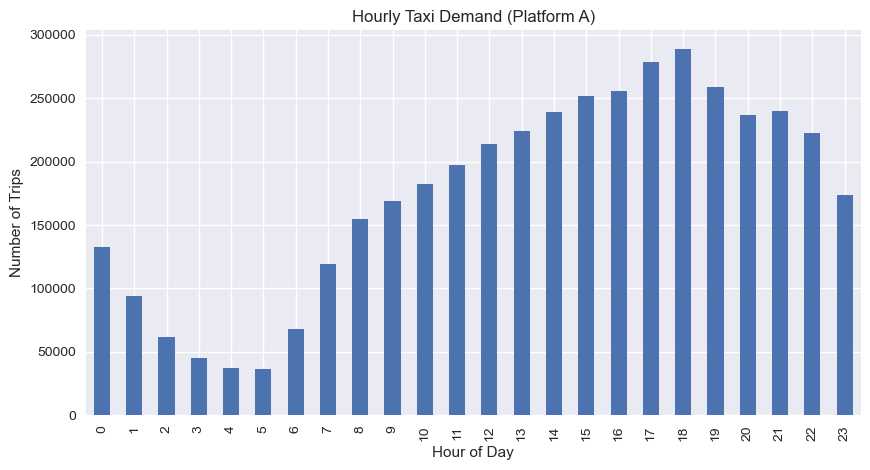

In [9]:
hourly_demand = df.groupby('hour').size()

plt.figure(figsize=(10,5))
hourly_demand.plot(kind='bar')
plt.title("Hourly Taxi Demand (Platform A)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()


## Market Insight: Demand Patterns

- Demand peaks during morning and evening commute hours
- Late-night and early-morning hours have lower competition

📌 Product Management Insight:
Entering during **low-competition hours reduces retaliation risk**
and customer acquisition cost.


## Pricing Benchmark (INCUMBENT BEHAVIOR)

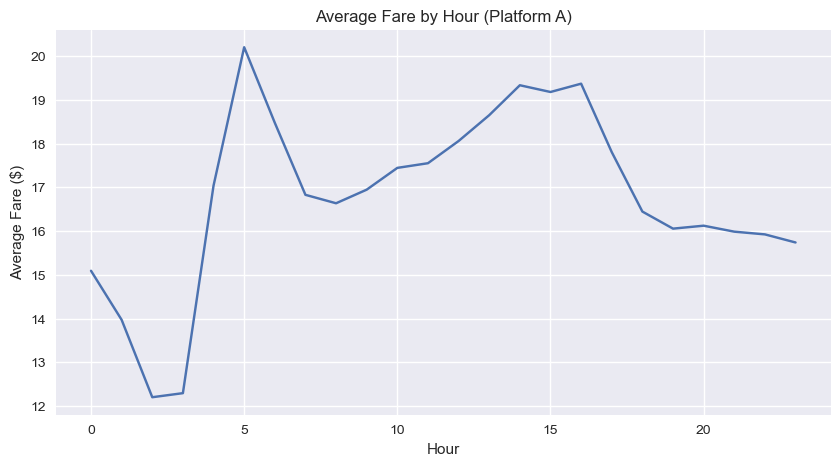

np.float64(17.117927029514203)

In [10]:
hourly_fare = df.groupby('hour')['fare_amount'].mean()

plt.figure(figsize=(10,5))
hourly_fare.plot()
plt.title("Average Fare by Hour (Platform A)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Hour")
plt.show()

avg_market_fare = df['fare_amount'].mean()
avg_market_fare


## Pricing Insight

- Higher fares during peak hours
- Lower fares off-peak

📌 Product Management:
Aggressive entry during peak hours may trigger a **price war**.


## Entry Strategy Problem

Platform B must decide:
- How much discount to offer?
- When to enter the market?
- How to grow without destroying profit?

This is a **strategic interaction**, not a pure optimization problem.


## Demand Response Model
This is where analytics becomes decision intelligence

In [11]:
def demand_capture(discount, base_demand):
    """
    Simple price elasticity model:
    Higher discount → higher demand capture
    """
    elasticity = 0.04
    return base_demand * (1 + elasticity * discount)


## Demand Modeling Assumptions

- Demand responds positively to discounts
- Elasticity reflects customer price sensitivity
- This is an assumption-based model used for scenario analysis

📌 Product Management:
Used in early-stage planning when historical data for new product does not exist.


## Revenue and profit model

In [12]:
def profit_model(price, demand, subsidy):
    revenue = price * demand
    cost = subsidy * demand
    return revenue - cost


## Simulating entry strategies

In [13]:
discounts = range(0, 31)
base_demand = hourly_demand.mean()

results = []

for d in discounts:
    price = avg_market_fare * (1 - d/100)
    demand = demand_capture(d, base_demand)
    profit = profit_model(price, demand, subsidy=2)
    results.append([d, price, demand, profit])

sim_df = pd.DataFrame(results, columns=[
    "Discount (%)", "Entry Price", "Demand", "Profit"
])


## Profit curve

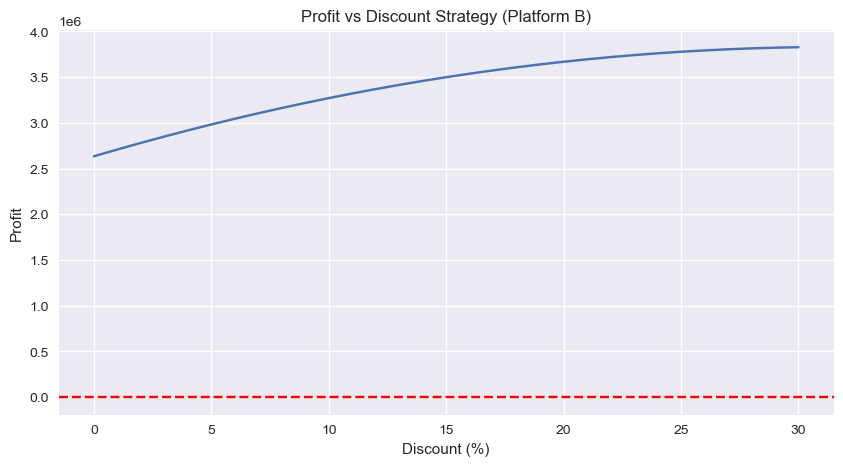

In [14]:
plt.figure(figsize=(10,5))
plt.plot(sim_df["Discount (%)"], sim_df["Profit"])
plt.axhline(0, color='red', linestyle='--')
plt.title("Profit vs Discount Strategy (Platform B)")
plt.xlabel("Discount (%)")
plt.ylabel("Profit")
plt.show()


## Strategic Insight

- Low discounts → low adoption
- Very high discounts → losses
- Moderate discounts maximize profit

📌 Product Management:
This identifies the **sweet spot** for entry pricing.


## Game Theory Perspective

This market resembles a Prisoner's Dilemma:

- If both platforms cut prices → both lose profit
- If one cuts prices → short-term gain
- If both maintain moderate pricing → stable equilibrium

Platform B must avoid **dominated strategies** that trigger retaliation.


## Nash Equilibrium Interpretation

The optimal strategy lies in:
- Moderate discounts
- Off-peak entry
- Gradual expansion

This strategy is stable because:
Neither platform benefits by unilaterally deviating.


## Product Roadmap for Platform B

### Introduction
- Off-peak entry
- Selective discounts
- Data-driven experimentation

### Growth
- Reduce subsidies
- Expand operating hours
- Focus on retention

### Maturity
- Feature differentiation
- Loyalty programs

### Innovation
- New services to avoid commoditization


## Final Recommendation

Platform B should:
- Avoid peak-hour price wars
- Use moderate discounts (10–18%)
- Enter during low-competition hours
- Scale gradually using data-driven feedback loops

This approach balances growth, profitability, and strategic stability.
